<a href="https://colab.research.google.com/github/TabithaWKariuki/Machine-Learning-Week-3/blob/main/Machine_Learning_Week_3_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nairobi Hospital Clinical Camp

## 1. Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

### c) Understanding the context

Hypothyroidism is a common condition where the thyroid doesn't create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures.

### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
7. Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.
8. Challenge your solution

### e) Data Relevance

The dataset [link text](http://bit.ly/IndependentProjectWeek7Dataset) has appropriate columns and data to answer the questions. They are both relevant for our analysis.

## 2. Importing all libraries

In [1]:
# Importing all neccessary libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, classification_report, f1_score,r2_score
import warnings
warnings.filterwarnings("ignore")

## 3. Reading the Data

In [2]:
# Loading the Dataset and previewing

hyp=pd.read_csv('hypothyroid.csv')

## 4. Checking the Data

In [3]:
# Determining the no. of records in our dataset

hyp.shape

(3163, 26)

In [4]:
# Previewing the top of our dataset

hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Previewing the bottom of our dataset

hyp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking whether each column has an appropriate datatype

hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
# checking the general information of our dataset.

hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 5. External Data Source Validation

I made sure my data matches something outside of the dataset link. The measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

## 6. Tidying the Dataset

In [8]:
# Identifying the Missing Data

hyp.isnull().sum()

# Our data has no missing values

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [9]:
# Checking for duplicates

hyp.duplicated().sum()

77

In [10]:
# Dropping the duplicates

hyp.drop_duplicates(inplace = True)

In [11]:
# Checking again for duplicates

hyp.duplicated().sum()

0

In [12]:
# Listing our columns

hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [13]:
# Checking the unique values in each column
# and finding the total unique values in each column  

for column in hyp.columns:                             
  print(column)                                        
  print(hyp[column].unique())                           
  print(hyp[column].nunique())                         
  print('\n**************')

status
['hypothyroid' 'negative']
2

**************
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93

**************
sex
['M' 'F' '?']
3

**************
on_thyroxine
['f' 't']
2

**************
query_on_thyroxine
['f' 't']
2

**************
on_antithyroid_medication
['f' 't']
2

**************
thyroid_surgery
['f' 't']
2

**************
query_hypothyroid
['f' 't']
2

**************
query_hyperthyroid
['f' 't']
2

**************
pregnant
['f' 't']
2

**************
sick
['f' 't']
2

**************
tumor
['f' 't']
2

**************
lithium
['f' 't']
2

**************
goitr

In [14]:
# Replace "?" values with 0

hypo=hyp.replace(['?'], 0)

In [15]:
# Previewing our data

hypo.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,0


In [16]:
# Changing the numerical columns to the appropriate datatypes
# checking the info to see conversion

numericals = ['age', 'T3','TSH', 'TT4', 'T4U', 'FTI' , 'TBG']
                                 
for column in hypo.columns:
  if column in numericals :
    hypo[column] = pd.to_numeric(hypo[column])

hypo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   object 
 1   age                        3086 non-null   int64  
 2   sex                        3086 non-null   object 
 3   on_thyroxine               3086 non-null   object 
 4   query_on_thyroxine         3086 non-null   object 
 5   on_antithyroid_medication  3086 non-null   object 
 6   thyroid_surgery            3086 non-null   object 
 7   query_hypothyroid          3086 non-null   object 
 8   query_hyperthyroid         3086 non-null   object 
 9   pregnant                   3086 non-null   object 
 10  sick                       3086 non-null   object 
 11  tumor                      3086 non-null   object 
 12  lithium                    3086 non-null   object 
 13  goitre                     3086 non-null   objec

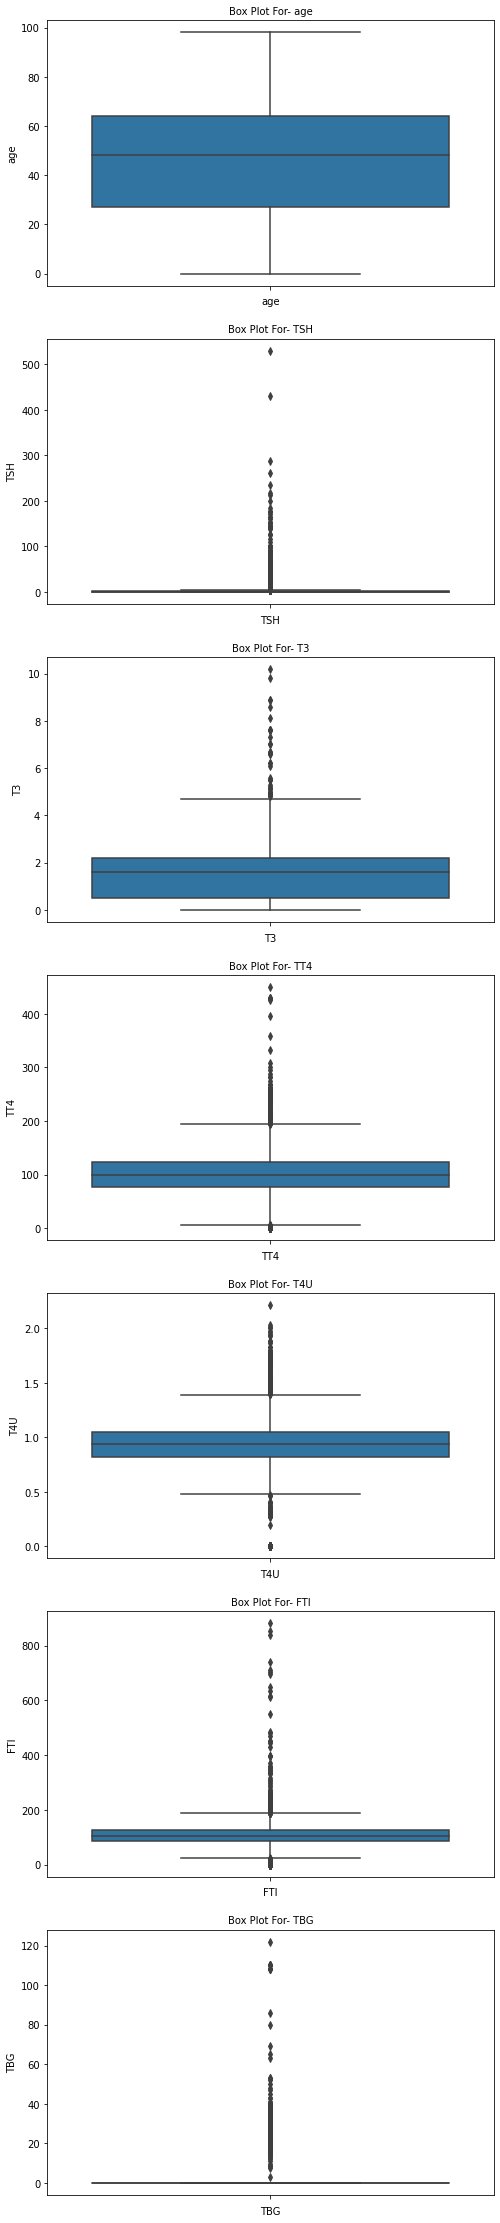

In [17]:
# Checking for Outliers for the following selected factors.

col = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

fig,ax = plt.subplots(len(col),figsize=(8,40))
for i , col_val in enumerate(col):
  sns.boxplot(y=hypo[col_val],ax=ax[i])
  ax[i].set_title('Box Plot For- {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

# all numerical variables have outliers except "age"

In [18]:
# dealing with outliers using quantiles

Q1 = hypo.quantile(0.25)
Q3 = hypo.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
new_hypo = hypo[~((hypo < (Q1 - 1.5 * IQR)) | (hypo > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(new_hypo.shape)

# Printing the shape of our old dataset
print(hypo.shape)

(2119, 26)
(3086, 26)


I will not be dropping the outliers since it causes a very high reduction in our data.

In [19]:
# we use the to_csv function to create a csv file with the name example 
# and export it

hypo.to_csv('CleanHypo.csv')

## 7. Exploratory Analysis

Univariate Analysis

In [20]:
# Getting summary statistics for the data

hypo.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,43.858069,4.952793,1.507583,100.252722,0.901850,106.582275,2.527090
std,25.239866,22.276447,1.179190,51.795700,0.339608,65.484772,10.135203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.500000,77.000000,0.820000,85.000000,0.000000
50%,48.000000,0.400000,1.600000,100.000000,0.940000,105.000000,0.000000
75%,64.000000,1.700000,2.200000,124.000000,1.050000,126.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [21]:
# Checking the counts for the 'sex variable'

hypo.sex.value_counts()

F    2119
M     894
0      73
Name: sex, dtype: int64

The female sex has the highest number of participants in this dataset. 

In [22]:
# Checking the mean of our variables

hypo.mean()

age     43.858069
TSH      4.952793
T3       1.507583
TT4    100.252722
T4U      0.901850
FTI    106.582275
TBG      2.527090
dtype: float64

In [23]:
# Checking the mode of our variables

hypo.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,negative,0,F,f,f,f,f,f,f,f,...,y,0.0,y,0.0,y,0.0,y,0.0,n,0.0


In [24]:
# Checking the median of our variables

hypo.median()

age     48.00
TSH      0.40
T3       1.60
TT4    100.00
T4U      0.94
FTI    105.00
TBG      0.00
dtype: float64

In [25]:
# Checking the skewness of our variables

hypo.skew()

age    -0.358123
TSH    11.115662
T3      1.127333
TT4     0.639240
T4U    -0.910451
FTI     3.714321
TBG     5.948398
dtype: float64

In [26]:
# Checking the kurtosis of our variables

hypo.kurt()

age     -0.929978
TSH    179.288170
T3       4.600644
TT4      3.763956
T4U      2.371720
FTI     33.481384
TBG     47.857232
dtype: float64

In [27]:
# Checking the variance of our variables

hypo.var()

age     637.050838
TSH     496.240083
T3        1.390489
TT4    2682.794565
T4U       0.115334
FTI    4288.255391
TBG     102.722345
dtype: float64

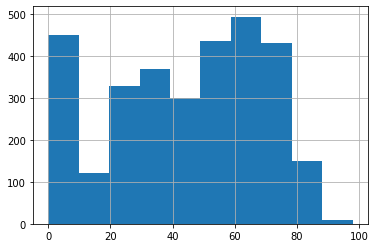

In [28]:
# Plotting a histogram for the age variable

hypo.age.hist()
plt.show()

The largest age group represented in our data falls between 50 and 80

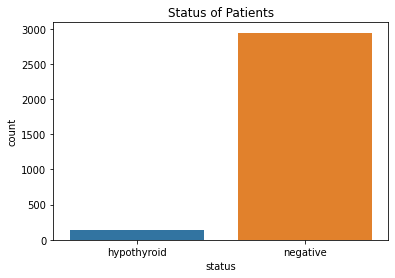

In [29]:
# Plotting a bar chart showing "status"

sns.countplot(x='status',data=hypo)
plt.title('Status of Patients')
plt.show()

Most repondents were negative with hypothyroidism

Bivariate Analysis

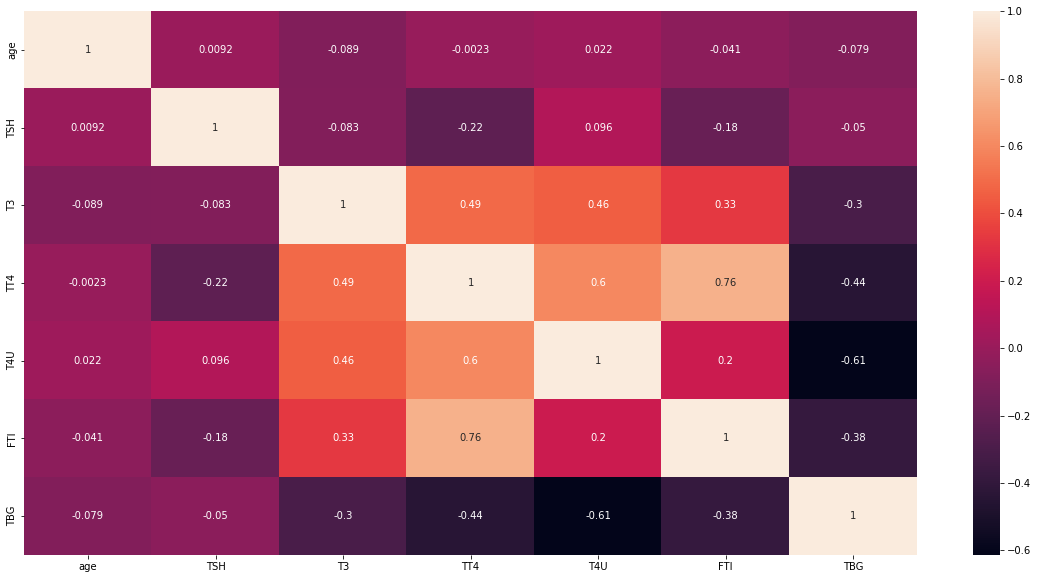

In [30]:
# heatmap to show correlation between variables

col=hypo[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]

corr = col.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

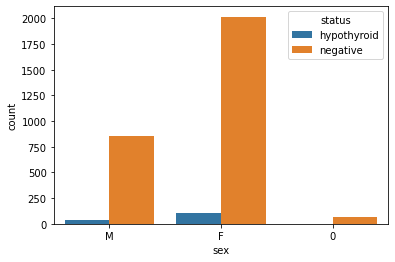

In [31]:
# Checking gender and their status

sns.countplot(x = 'sex', hue = 'status', data = hypo)
plt.show()

Female repondents have high numbers represented in both status.

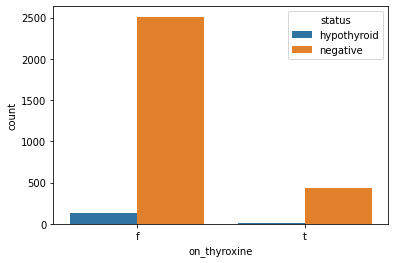

In [32]:
# Checking status for individuals on thyroxine

sns.countplot(x = 'on_thyroxine', hue = 'status', data = hypo)
plt.show()

Repondents that are not on thyroxine have low levels hypothyroid

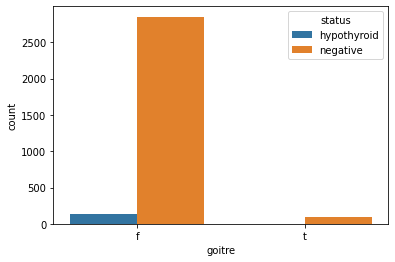

In [33]:
# Checking status for individuals with goitre

sns.countplot(x = 'goitre', hue = 'status', data = hypo)
plt.show()

Respondents that had goitre tested had almost no hypothyroidism

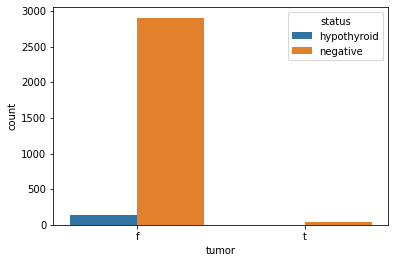

In [34]:
# Checking status for individuals with tumor

sns.countplot(x = 'tumor', hue = 'status', data = hypo)
plt.show()

Respondents that had tumor had almost no hypothyroidism 

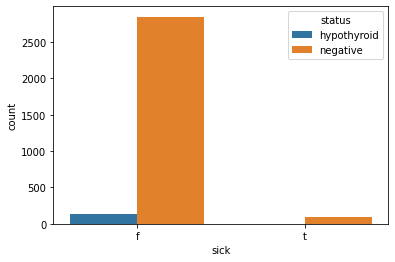

In [35]:
# Checking status for individuals with sickness

sns.countplot(x = 'sick', hue = 'status', data = hypo)
plt.show()

Respondents that were sick had almost no hypothyroidism 

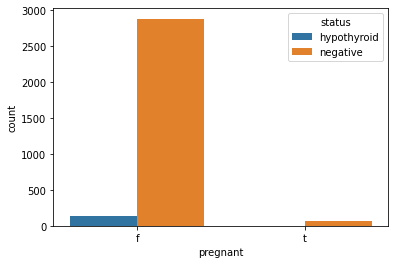

In [36]:
# Checking status for individuals who were pregnant

sns.countplot(x = 'pregnant', hue = 'status', data = hypo)
plt.show()

Respondents that were pregnant had almost no hypothyroidism 

## 7. Implementing the Solution

In [37]:
# dropping unnecessary colums

thyroid = hypo.drop(columns=['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'])

In [38]:
# checking the datatypes again

thyroid.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
TBG                          float64
dtype: object

In [39]:
# Converting categorical variables to numerical variables

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

thyroid['status'] = label_encoder.fit_transform(thyroid['status'])
thyroid['on_thyroxine'] = label_encoder.fit_transform(thyroid['on_thyroxine'])
thyroid['query_on_thyroxine'] = label_encoder.fit_transform(thyroid['query_on_thyroxine'])
thyroid['on_antithyroid_medication'] = label_encoder.fit_transform(thyroid['on_antithyroid_medication'])
thyroid['thyroid_surgery'] = label_encoder.fit_transform(thyroid['thyroid_surgery'])
thyroid['query_hypothyroid'] = label_encoder.fit_transform(thyroid['query_hypothyroid'])
thyroid['query_hyperthyroid'] = label_encoder.fit_transform(thyroid['query_hyperthyroid'])
thyroid['pregnant'] = label_encoder.fit_transform(thyroid['pregnant'])
thyroid['sick'] = label_encoder.fit_transform(thyroid['sick'])
thyroid['tumor'] = label_encoder.fit_transform(thyroid['tumor'])
thyroid['lithium'] = label_encoder.fit_transform(thyroid['lithium'])
thyroid['goitre'] = label_encoder.fit_transform(thyroid['goitre'])

In [40]:
# Converting Male and Female values in the sex column to numerical values using the map function.

thyroid['sex'] =thyroid['sex'].map({'M':1, 'F':2})

In [41]:
# Previewing our data 

thyroid.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG
0,0,72,1.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,0.0
1,0,15,2.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,0.0
2,0,24,1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,0.0


In [42]:
# checking for null values

thyroid.isnull().sum()

# the conversion of the sex column has caused the presence of null values

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH                           0
T3                            0
TT4                           0
T4U                           0
FTI                           0
TBG                           0
dtype: int64

In [43]:
# Dropping the sex column 

thyroid = thyroid.drop(columns=['sex'])

In [44]:
# Previewing our data again

thyroid.isnull().sum()

status                       0
age                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
TBG                          0
dtype: int64

**Part 1: Decision trees**

**Random Forest**

In [45]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict whether or not the patient's symptoms indicate that the patient has hypothyroid.
# so we will our column status as y

y = thyroid['status'].values

test_features = thyroid.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.

X = thyroid[test_features].values

# Train using 70% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the model

from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth

forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,926.000000,926.000000
mean,0.957883,0.955823
std,0.200964,0.182798
min,0.000000,0.013233
25%,1.000000,0.999639
50%,1.000000,0.999984
75%,1.000000,0.999984
max,1.000000,0.999984


In [46]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.014606796432790036
Mean Squared Error: 0.005760108607092121
Root Mean Squared Error: 0.07589537935271239


In [47]:
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 7.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


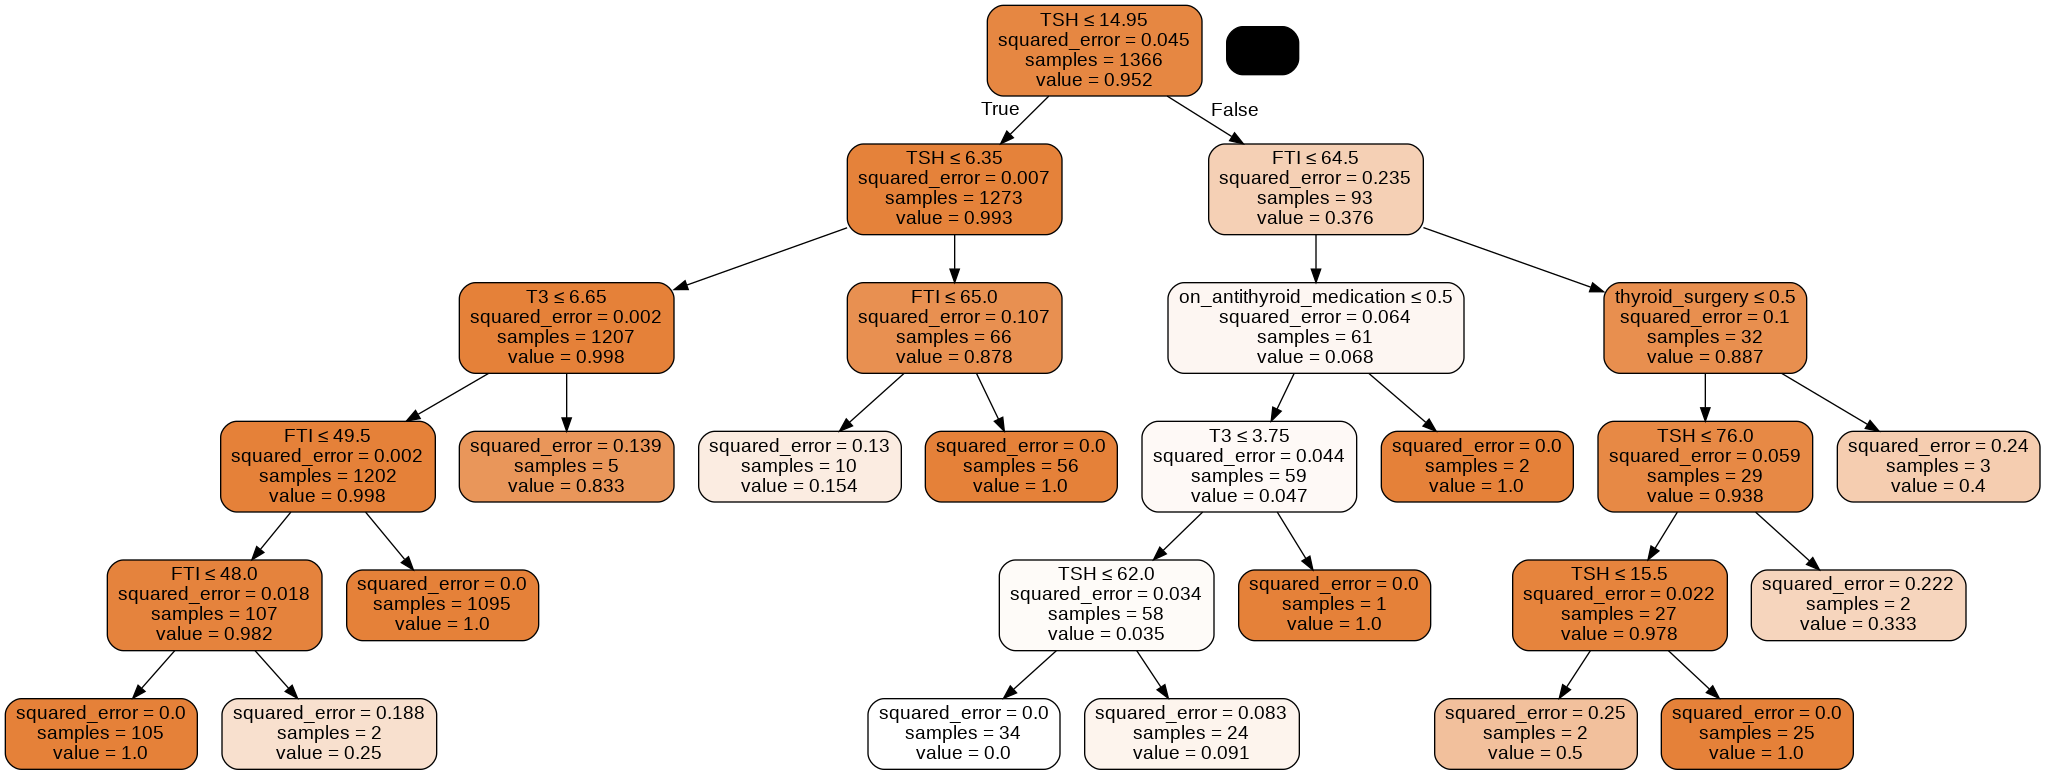

In [48]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroid_forest.png')
Image(graph.create_png())

In [49]:
# Get numerical feature importances

importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.59), ('T3', 0.01), ('TT4', 0.0), ('T4U', 0.0), ('FTI', 0.36), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.59
Variable: FTI                  Importance: 0.36
Variable: on_antithyroid_medication Importance: 0.02
Variable: thyroid_surgery      Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: age                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium  

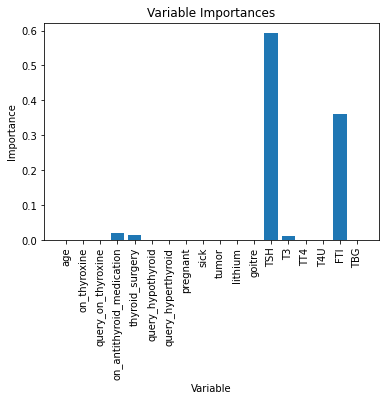

In [50]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks

import matplotlib.pyplot as plt

# list of x locations for plotting

x_values = list(range(len(importances)))

# Make a bar chart

plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis

plt.xticks(x_values, test_features, rotation='vertical')

# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

If we are going to determines whether or not the patient's symptoms indicate that the patient has hypothyroid, we will need the following variables; Variable: TSH                  
Variable: FTI                  
Variable: on_antithyroid_medication 
Variable: TT4                  
Variable: thyroid_surgery

In [51]:
# Using the 'tsh' feature only to build a prediction model
# Splitting the data into Features set and Labels
# And reshaping since it is one feature.

x=thyroid['TSH'].values.reshape(-1,1) 
y = thyroid['status'].values

# Splitting the data  into training and test sets   
# training data at 80%

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [52]:
# Fitting the model

forest = RandomForestClassifier(n_estimators = 300, random_state=42, min_samples_split=10, max_depth=4)

forest = forest.fit(x_train, y_train)

In [53]:
# Making predictions

y_pred = forest.predict(x_test)

In [54]:
# Evaluating the performance of the model using the confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[ 17   8]
 [  8 585]]


In [55]:
# Importing sklearn metrics library

from sklearn import metrics

# Checking model Accuracy

print("Random Forest Accuracy: " ,metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy:  0.9741100323624595


The model gives 97% accuracy using the most important variable TSH.

**Ada boosted trees**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Train using 80% of the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4

tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.

tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time

y_pred_tree = tree.predict(X)

In [59]:
# Standardising the X_train and the X_test to the same scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Importing sklearn adaboast classifier model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor

# Fitting the adaboost model

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=300)

In [61]:
# Training the model

ada_boost=ada_boost.fit(X_train, y_train)

In [62]:
# Making predictions of the model

y_pred = ada_boost.predict(X_test)

# Evaluate the performance of the model

print(confusion_matrix(y_test,y_pred))

[[ 23   2]
 [  3 590]]


In [63]:
# Checking the accuracy of the model

print("Accuracy is: ", metrics.accuracy_score(y_test, y_pred))

Accuracy is:  0.9919093851132686


Our Adaboost classifier gives an accuracy level of 99.2%

**Gradient boosted trees**

In [64]:
# Importing sklearn gradient boosting classifier model

from sklearn.ensemble import GradientBoostingClassifier

# Fitting the gradient boosting classifier model
# Target tree number=300

gbr = GradientBoostingClassifier(n_estimators= 300, learning_rate=0.1, max_depth=4,min_samples_split=10)

In [65]:
# Training the model

gbr = gbr.fit(X_train, y_train)

# Making the predictions

y_pred_gbr = gbr.predict(X_test)

In [66]:
# Evaluate the performance of the model

print("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_gbr))

Accuracy is:  0.9935275080906149


Our gradient boosted classifier accuracy is 99.4% 

**Part 2: SVM**

In [67]:
# Splitting dataset into features/indepedent and target/label variable

hypothy = thyroid.drop('status', axis=1)
y = thyroid['status']

#importing sklearn PCA library

from sklearn.decomposition import PCA

#Applying the reduction algorithm: PCA to feature variables.

pca = PCA(n_components=2).fit(hypothy)
X = pca.transform(hypothy)
X.shape

(3086, 2)

**Polynomial SVM**

In [68]:
# Splitting datasset into training and test data.
# 80% of data to training data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
# Building model with poly kernel

from sklearn.svm import SVC

svc = SVC(kernel = 'poly', C = 1, degree=3, gamma = 'auto')

# Fitting the model

#importing sklearn train_test_split library

from sklearn.model_selection import train_test_split

svc.fit(X_train, y_train)

In [ ]:
# Fitting the model

#importing sklearn train_test_split library

from sklearn.model_selection import train_test_split

svc.fit(X_train, y_train)

The code above is failing to execute

**Linear SVM**

In [ ]:
# Building model with linear kernel, c=1 and gamma =0.001

svc = SVC(kernel = 'linear',  C = 1, degree=3, gamma = 0.001)

# Fitting the model

svc.fit(X_train, y_train)

# Predicting the model

y_pred_linear = svc.predict(X_test)

In [ ]:
# The confusion matrix

print(confusion_matrix(y_test, y_pred_linear))

In [ ]:
# Evaluating the model accuracy

from sklearn.metrics import accuracy_score 

print("linear SMV Accuracy: ", metrics.accuracy_score(y_test, y_pred_linear))

In [ ]:
# Building the model

svc = SVC(kernel = 'rbf', C = 1, degree=3, gamma = 0.001)

**Radial basis function**

In [ ]:
# Building the model

svc = SVC(kernel = 'rbf', C = 1, degree=3, gamma = 0.001)

# Fitting the model

svc.fit(X_train, y_train)

# Predicting the model

y_pred_rbf = svc.predict(X_test)

In [ ]:
# Confusion matrix

print(confusion_matrix(y_test, y_pred_rbf))

In [ ]:
# Evaluating the model accuracy

from sklearn.metrics import accuracy_score 

print(" RBF Accuracy: ", metrics.accuracy_score(y_test, y_pred_rbf))